# This is our notebook

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.model import MLP
from src.Optimizers import HBG, CG

In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1485, 9)
(1485, 2)
(529, 9)


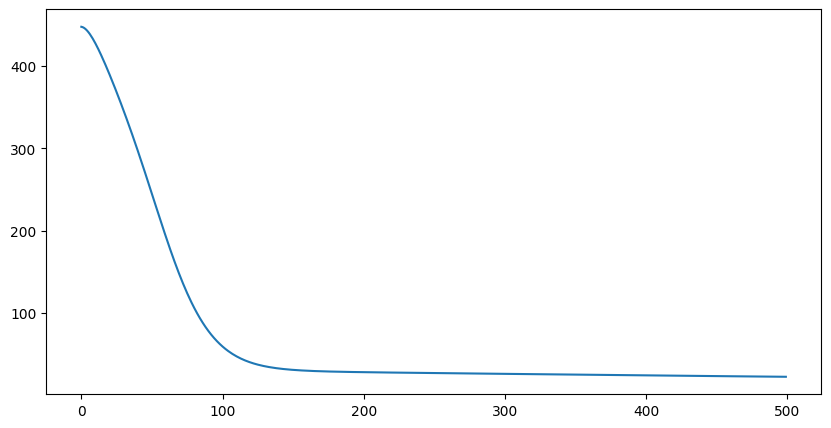

In [3]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'
max_epochs = 500
verbose = False

mlp = MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)


mlp.initialize()
optimizer.initialize(mlp, alpha = 1e-4, beta = 0.9, stopping_value = max_epochs, alpha_l2 = alpha_l2, verbose = verbose)
optimizer.fit_model(X_train, y_train)


fig, ax = plt.subplots(1,1, figsize = (10,5))

ax.plot(optimizer.obj_history, label = 'HBG objective function')

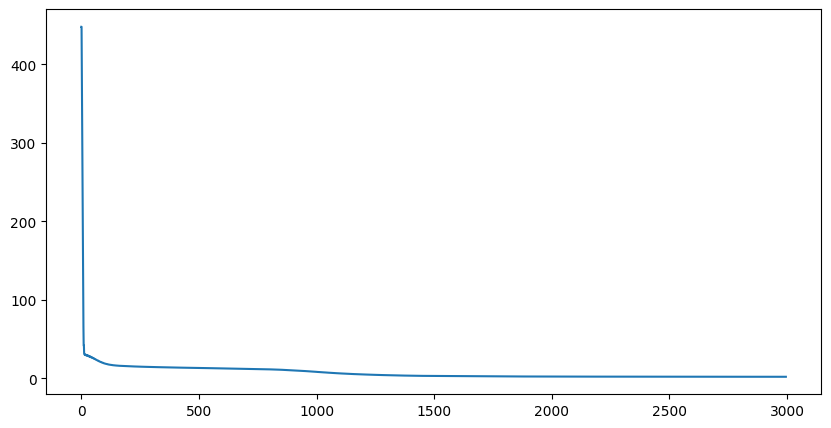

In [4]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'
max_epochs = 500
verbose = False

mlp = MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = CG(loss, regularization, stopping_criterion)

mlp.initialize()
optimizer.initialize(mlp, stopping_value = max_epochs, alpha_l2 = alpha_l2, verbose = verbose)
optimizer.fit_model(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (10,5))

ax.plot(optimizer.obj_history, label = 'CG objective function')

## Grid Search on HBG

In [5]:
from src.GridSearch import GridSearch

In [6]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'stopping_value' : [500],
    'alpha' : [1e-4, 1e-3, 1e-2],
    'beta' : [0.7, 0.8, 0.9, 0.99],
    'alpha_l2' : [1e-4, 1e-3, 1e-2]
}

model = MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model)

tic = time.time()
grid.fit(X_train, y_train, params_grid, parallel = False)
toc = time.time()

print("Time elapsed: ", toc - tic)

tic = time.time()
grid.fit(X_train, y_train, params_grid, parallel = True)
toc = time.time()

print("Time elapsed: ", toc - tic)


Grid search of 36 combinations.


100%|██████████| 36/36 [00:54<00:00,  1.52s/it]




Parameters of best model, evaluated on mean validation error: {'stopping_value': 500, 'alpha': 0.01, 'beta': 0.9, 'alpha_l2': 0.001}
Validation error on 1 folds for best model: [2.1573328169421786]
Mean validation error: 2.1573328169421786
Time elapsed:  56.743760108947754
Grid search of 36 combinations.


Parameters of best model, evaluated on mean validation error: {'stopping_value': 500, 'alpha': 0.01, 'beta': 0.9, 'alpha_l2': 0.0001}
Validation error on 1 folds for best model: [2.1602192373201548]
Mean validation error: 2.1602192373201548
Time elapsed:  16.38960886001587
